# 2D Convolution

## libraries

In [1]:
import numpy as np
import cv2 as cv
from matplotlib.pyplot import *

## computation using sums

### image

[[1 2 3]
 [4 5 6]
 [7 8 9]]


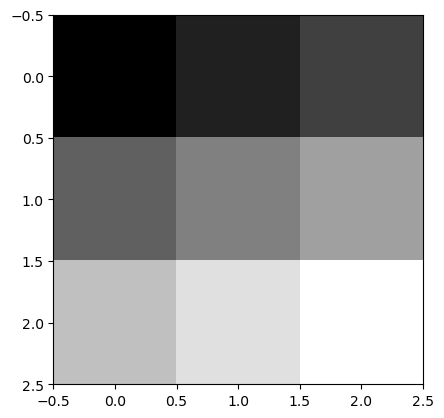

In [2]:
im = np.array ([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print (im)
imshow (im, cmap = 'gray')

### line oriented or column oriented?

In [3]:
print (im [0, 1])
print (im [1, 0])

2
4


### kernel

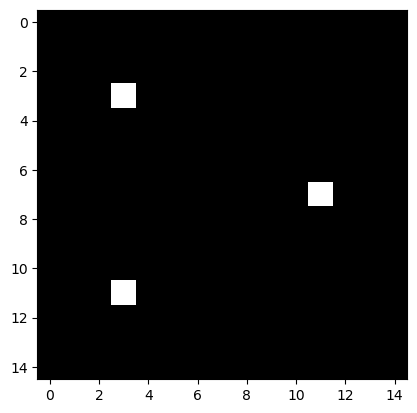

In [4]:
kern = np.zeros (shape = (15, 15))
kern [3, 3] = 1
kern [11, 3] = 1
kern [7, 11] = 1
imshow (kern, cmap = 'gray')

### convolution

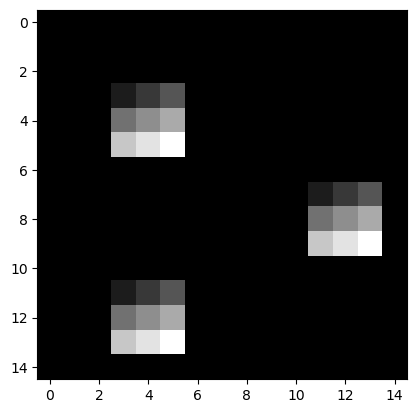

In [5]:
im0 = im
kern0 = kern

Mi = im0.shape [0]; Mk = kern0.shape [0]; M = max (Mi, Mk)
Ni = im0.shape [1]; Nk = kern0.shape [1]; N = max (Ni, Nk)

def Pixel (im, u, v):
    m = im.shape [0]
    n = im.shape [1]
    if ((0 <= u) & (u < m) & (0 <= v) & (v < n)):
        return im [u, v]
    return 0

def I (u, v):
    return Pixel (im0, u, v)

def H (u, v):
    return Pixel (kern0, u, v)

def Conv0 (u, v):
    s = 0
    for i in range (M):
        for j in range (N):
            s = s + I (u - i, v - j) * H (i, j)
    return s

def Conv ():
    res = np.zeros (shape = (M, N))
    for i in range (M):
        for k in range (N):
            res [i, k] = Conv0 (i, k)
    return res

res0 = Conv ()
imshow (res0, cmap = 'gray')

## first example: positioning

### image

[[1 2 3]
 [4 5 6]
 [7 8 9]]


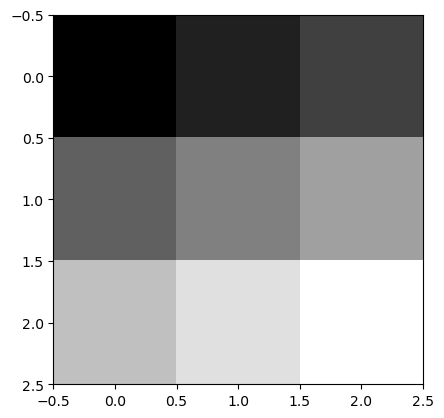

In [6]:
im1 = np.array ([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print (im1)
imshow (im1, cmap = 'gray')

### kernel

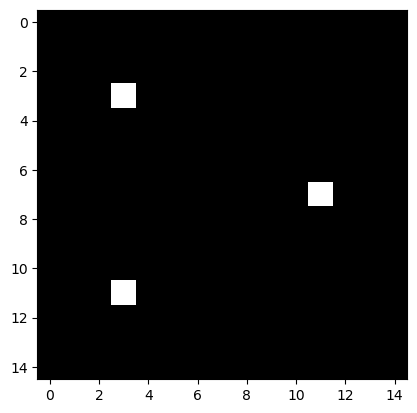

In [7]:
kern1 = np.zeros (shape = (15, 15))
kern1 [3, 3] = 1
kern1 [11, 3] = 1
kern1 [7, 11] = 1
imshow (kern1, cmap = 'gray')

### convolution, wrong

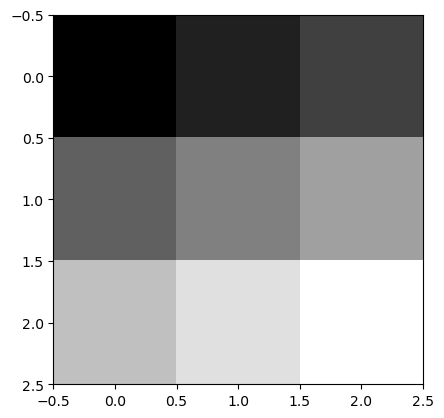

In [8]:
res1a = cv.filter2D (im1, -1, kern1)
imshow (res1a, cmap = 'gray')

### convolution right, but second parameter wrong

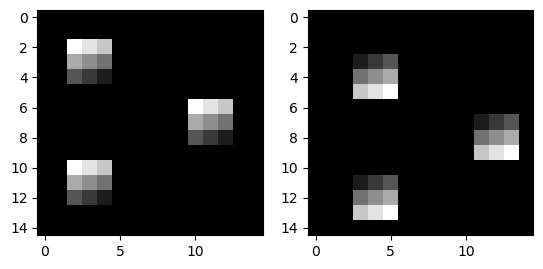

In [9]:
res1b = cv.filter2D (kern1, -1, im1)
subplot (1, 2, 1); imshow (res1b, cmap = 'gray')
subplot (1, 2, 2); imshow (res0, cmap = 'gray')

### both convolution and second parameter right

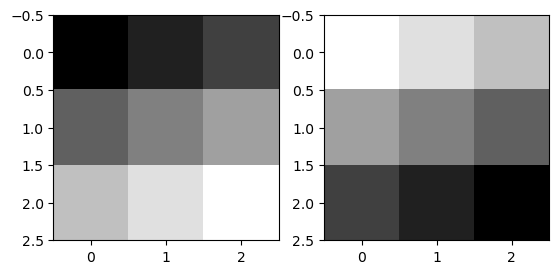

In [10]:
im1c = cv.flip (im1, -1)
subplot (1, 2, 1); imshow (im1, cmap = 'gray')
subplot (1, 2, 2); imshow (im1c, cmap = 'gray')

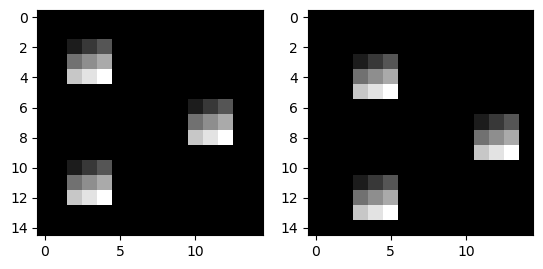

In [11]:
res1c = cv.filter2D (kern1, -1, im1c)
subplot (1, 2, 1); imshow (res1c, cmap = 'gray')
subplot (1, 2, 2); imshow (res0, cmap = 'gray')

## second example: smoothing filter

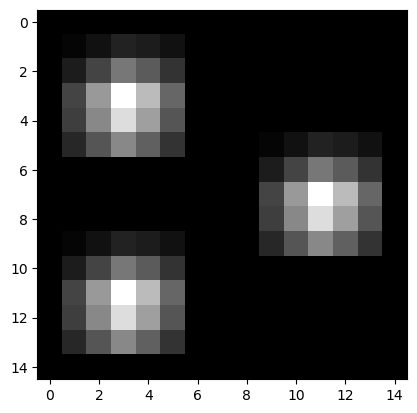

In [12]:
im2 = res1c
kern2 = np.array ([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
res2 = cv.filter2D (im2, -1, kern2)
imshow (res2, cmap = 'gray')